# 1. Preparación de Datos

Empezamos con la carga, exploración, limpieza y preprocesamiento de los datos, dejando el dataset listo para las siguientes implementaciones. 

In [15]:
# Importación de librerías
# !pip install pyreadr
!pip install scikit-learn

# import pyreadr
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1. Función de carga de datos

Los archivos originales eran demasiado grandes por lo que decidimos reducirlos. Los originales estaban en formato .RData, pero al reducirlos los guardamos en formato csv. Estos archivos reducidos son con los que vamos a trabajar de aqui en adelante.

In [16]:
DATA_DIR = "DatasetReducido"

def load_csv(file_name):
    file_path = os.path.join(DATA_DIR, file_name)
    return pd.read_csv(file_path)

### 2. Carga de datasets

El benchmark TEP incluye cuatro conjuntos principales:

- **Fault Free Training**: simulaciones sin fallos para entrenamiento.  
- **Fault Free Testing**: simulaciones sin fallos para validación.  
- **Faulty Training**: simulaciones con distintos fallos para entrenamiento.  
- **Faulty Testing**: simulaciones con fallos para validación.

In [19]:
datasets = {
    "Fault Free Training": load_csv("FaultFree_Training_reduced.csv"),
    "Fault Free Testing": load_csv("FaultFree_Testing_reduced.csv"),
    "Faulty Training": load_csv("Faulty_Training_reduced.csv"),
    "Faulty Testing": load_csv("Faulty_Testing_reduced.csv")
}

In [20]:
for name, df in datasets.items():
    print(f"\n--- {name} ---")
    print("Columnas:", df.columns.tolist())
    print("Tamaño:", df.shape)
    print("Primeras filas:")
    display(df.head())


--- Fault Free Training ---
Columnas: ['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11', 'fault_present']
Tamaño: (10000, 56)
Primeras filas:


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,0.0,10.0,1,0.25125,3671.5,4498.3,9.3137,26.652,42.276,2705.1,...,24.572,60.716,22.456,39.745,41.519,44.748,47.380,41.004,18.549,0
1,0.0,10.0,2,0.25068,3661.1,4533.6,9.2646,26.894,42.133,2705.6,...,24.629,62.093,22.091,40.031,35.268,49.621,47.300,41.822,14.796,0
2,0.0,10.0,3,0.24835,3656.7,4496.2,9.3947,27.098,42.706,2704.4,...,24.865,60.299,22.107,39.766,39.829,47.063,47.545,40.894,18.325,0
3,0.0,10.0,4,0.24777,3649.6,4524.2,9.4125,26.842,42.766,2704.5,...,24.922,59.825,22.018,39.975,39.998,46.470,47.433,41.288,15.854,0
4,0.0,10.0,5,0.26755,3587.1,4476.1,9.3137,27.090,42.104,2703.6,...,26.065,59.509,22.012,40.246,35.800,45.888,47.480,40.297,17.302,0



--- Fault Free Testing ---
Columnas: ['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11', 'fault_present']
Tamaño: (19200, 56)
Primeras filas:


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,0,10.0,1,0.25122,3670.3,4469.7,9.3254,26.859,42.366,2704.2,...,24.575,62.416,21.959,39.931,35.665,42.923,47.299,41.490,18.261,0
1,0,10.0,2,0.25194,3651.0,4450.6,9.1660,26.618,42.044,2705.3,...,24.504,64.163,22.247,39.968,41.853,47.886,47.260,41.486,18.260,0
2,0,10.0,3,0.25131,3646.0,4508.5,9.3401,26.596,42.780,2705.3,...,24.574,62.551,22.187,39.775,39.963,47.403,47.516,40.858,20.620,0
3,0,10.0,4,0.25118,3627.0,4516.3,9.2717,26.864,42.387,2705.6,...,24.587,61.818,22.192,39.664,36.950,46.967,47.496,41.120,16.733,0
4,0,10.0,5,0.25691,3656.9,4515.5,9.3580,27.041,42.763,2704.3,...,25.663,61.038,22.198,39.918,42.758,43.768,47.433,40.575,18.091,0



--- Faulty Training ---
Columnas: ['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11', 'fault_present']
Tamaño: (100000, 56)
Primeras filas:


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,1,69.0,1,0.25105,3653.8,4502.8,9.3635,26.643,42.327,2704.7,...,24.592,62.980,22.080,40.112,37.428,44.084,47.385,42.109,15.128,1
1,1,69.0,2,0.25185,3689.2,4479.0,9.2082,26.993,42.043,2706.0,...,24.514,61.301,22.193,39.931,37.877,44.949,47.455,40.861,17.614,1
2,1,69.0,3,0.25221,3667.5,4555.3,9.3165,26.827,42.402,2704.3,...,24.486,60.529,21.828,40.058,33.198,44.813,47.457,41.130,20.663,1
3,1,69.0,4,0.25256,3673.3,4486.1,9.3145,26.985,42.461,2701.0,...,24.451,63.898,21.653,39.950,37.459,49.350,47.511,40.586,19.034,1
4,1,69.0,5,0.24168,3708.1,4508.5,9.3236,27.199,42.194,2703.8,...,23.656,62.561,22.162,37.875,35.252,47.723,47.532,41.481,17.127,1



--- Faulty Testing ---
Columnas: ['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11', 'fault_present']
Tamaño: (192000, 56)
Primeras filas:


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,1,69.0,1,0.25065,3636.6,4496.9,9.3156,26.715,42.248,2705.0,...,24.631,60.583,22.172,40.228,35.160,47.077,47.501,40.349,18.834,1
1,1,69.0,2,0.24807,3675.0,4498.3,9.3146,27.204,42.252,2704.1,...,24.884,61.844,22.375,40.128,38.003,48.149,47.486,40.967,20.043,1
2,1,69.0,3,0.24843,3629.2,4504.9,9.5091,26.875,42.140,2705.3,...,24.858,62.711,22.196,40.087,32.950,47.967,47.339,41.539,17.325,1
3,1,69.0,4,0.25042,3678.2,4512.0,9.2943,26.884,42.065,2705.8,...,24.662,62.549,22.183,40.184,40.418,45.045,47.446,41.616,17.050,1
4,1,69.0,5,0.26560,3703.6,4496.5,9.3821,26.933,42.227,2706.3,...,25.898,61.799,22.258,41.218,34.065,46.775,47.492,41.415,17.790,1


### 3. Definición de variables

El proceso TEP incluyen dos grupos de variables, que vamos a definir para facilitar su acceso cuando sea necesario. 

- 41 variables de proceso, mediciones de sensores dentro de la planta química simulada: (`xmeas_1` a `xmeas_41`)  
- 11 variables de actuadores, variables manipuladas por los controladores de la planta : (`xmv_1` a `xmv_11`)

In [21]:
process_vars = [f"xmeas_{i}" for i in range(1, 42)]
actuator_vars = [f"xmv_{i}" for i in range(1, 12)]

In [22]:
print("\nVariables de proceso:", process_vars)
print("\nVariables de actuadores:", actuator_vars)


Variables de proceso: ['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41']

Variables de actuadores: ['xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']


### 4. Información general de cada dataset

Enseñamos en formato DataFrame:
- Tamaño del dataset (df.shape)
- Número de simulaciones (simulationRun.nunique())
- Rango temporal de muestras (sample.min() – sample.max())
- Fallos presentes (si existe la columna faultNumber)
- Conteo de fallos (solo en los datasets Faulty)

In [23]:
import pandas as pd

# Crear lista de resúmenes
resumen = []
for name, df in datasets.items():
    info = {
        "Dataset": name,
        "Tamaño": df.shape,
        "Nº simulaciones": df['simulationRun'].nunique(),
        "Rango muestras": f"{df['sample'].min()} - {df['sample'].max()}"
    }
    if 'faultNumber' in df.columns:
        info["Fallos presentes"] = sorted(df['faultNumber'].unique())
        if name.startswith("Faulty"):
            info["Conteo fallos"] = df['faultNumber'].value_counts().sort_index().to_dict()
    resumen.append(info)

# Convertir a DataFrame
tabla_resumen = pd.DataFrame(resumen)

# Mostrar tabla resumen
print("\n=== Resumen de datasets ===")
display(tabla_resumen)

# Mostrar head de cada dataset
for name, df in datasets.items():
    print(f"\n--- Head de {name} ---")
    display(df.head())


=== Resumen de datasets ===


,Dataset,Tamaño,Nº simulaciones,Rango muestras,Fallos presentes,Conteo fallos
0,Fault Free Training,"(10000, 56)",20,1 - 500,[0.0],NaN
1,Fault Free Testing,"(19200, 56)",20,1 - 960,[0],NaN
2,Faulty Training,"(100000, 56)",10,1 - 500,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, ..."
3,Faulty Testing,"(192000, 56)",10,1 - 960,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{1: 9600, 2: 9600, 3: 9600, 4: 9600, 5: 9600, ..."



--- Head de Fault Free Training ---


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,0.0,10.0,1,0.25125,3671.5,4498.3,9.3137,26.652,42.276,2705.1,...,24.572,60.716,22.456,39.745,41.519,44.748,47.380,41.004,18.549,0
1,0.0,10.0,2,0.25068,3661.1,4533.6,9.2646,26.894,42.133,2705.6,...,24.629,62.093,22.091,40.031,35.268,49.621,47.300,41.822,14.796,0
2,0.0,10.0,3,0.24835,3656.7,4496.2,9.3947,27.098,42.706,2704.4,...,24.865,60.299,22.107,39.766,39.829,47.063,47.545,40.894,18.325,0
3,0.0,10.0,4,0.24777,3649.6,4524.2,9.4125,26.842,42.766,2704.5,...,24.922,59.825,22.018,39.975,39.998,46.470,47.433,41.288,15.854,0
4,0.0,10.0,5,0.26755,3587.1,4476.1,9.3137,27.090,42.104,2703.6,...,26.065,59.509,22.012,40.246,35.800,45.888,47.480,40.297,17.302,0



--- Head de Fault Free Testing ---


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,0,10.0,1,0.25122,3670.3,4469.7,9.3254,26.859,42.366,2704.2,...,24.575,62.416,21.959,39.931,35.665,42.923,47.299,41.490,18.261,0
1,0,10.0,2,0.25194,3651.0,4450.6,9.1660,26.618,42.044,2705.3,...,24.504,64.163,22.247,39.968,41.853,47.886,47.260,41.486,18.260,0
2,0,10.0,3,0.25131,3646.0,4508.5,9.3401,26.596,42.780,2705.3,...,24.574,62.551,22.187,39.775,39.963,47.403,47.516,40.858,20.620,0
3,0,10.0,4,0.25118,3627.0,4516.3,9.2717,26.864,42.387,2705.6,...,24.587,61.818,22.192,39.664,36.950,46.967,47.496,41.120,16.733,0
4,0,10.0,5,0.25691,3656.9,4515.5,9.3580,27.041,42.763,2704.3,...,25.663,61.038,22.198,39.918,42.758,43.768,47.433,40.575,18.091,0



--- Head de Faulty Training ---


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,1,69.0,1,0.25105,3653.8,4502.8,9.3635,26.643,42.327,2704.7,...,24.592,62.980,22.080,40.112,37.428,44.084,47.385,42.109,15.128,1
1,1,69.0,2,0.25185,3689.2,4479.0,9.2082,26.993,42.043,2706.0,...,24.514,61.301,22.193,39.931,37.877,44.949,47.455,40.861,17.614,1
2,1,69.0,3,0.25221,3667.5,4555.3,9.3165,26.827,42.402,2704.3,...,24.486,60.529,21.828,40.058,33.198,44.813,47.457,41.130,20.663,1
3,1,69.0,4,0.25256,3673.3,4486.1,9.3145,26.985,42.461,2701.0,...,24.451,63.898,21.653,39.950,37.459,49.350,47.511,40.586,19.034,1
4,1,69.0,5,0.24168,3708.1,4508.5,9.3236,27.199,42.194,2703.8,...,23.656,62.561,22.162,37.875,35.252,47.723,47.532,41.481,17.127,1



--- Head de Faulty Testing ---


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_present
0,1,69.0,1,0.25065,3636.6,4496.9,9.3156,26.715,42.248,2705.0,...,24.631,60.583,22.172,40.228,35.160,47.077,47.501,40.349,18.834,1
1,1,69.0,2,0.24807,3675.0,4498.3,9.3146,27.204,42.252,2704.1,...,24.884,61.844,22.375,40.128,38.003,48.149,47.486,40.967,20.043,1
2,1,69.0,3,0.24843,3629.2,4504.9,9.5091,26.875,42.140,2705.3,...,24.858,62.711,22.196,40.087,32.950,47.967,47.339,41.539,17.325,1
3,1,69.0,4,0.25042,3678.2,4512.0,9.2943,26.884,42.065,2705.8,...,24.662,62.549,22.183,40.184,40.418,45.045,47.446,41.616,17.050,1
4,1,69.0,5,0.26560,3703.6,4496.5,9.3821,26.933,42.227,2706.3,...,25.898,61.799,22.258,41.218,34.065,46.775,47.492,41.415,17.790,1


### 5. Estadísticas descriptivas generales

Calculamos estadísticas básicas (media, desviación estándar, mínimo, percentiles y máximo) para todas las variables de proceso y actuadores en cada dataset, mostrando el resultado en una tabla para cada dataset.


In [24]:
import pandas as pd

# Crear lista de resúmenes estadísticos
estadisticas = []
for name, df in datasets.items():
    stats = df[process_vars + actuator_vars].describe().T[['mean','std','min','25%','50%','75%','max']]
    stats.insert(0, "Variable", stats.index)  
    stats.insert(0, "Dataset", name)          
    estadisticas.append(stats)

# Concatenar todas las tablas en una sola
tabla_estadisticas = pd.concat(estadisticas, ignore_index=True)

# Mostrar tabla resumen
print("\n=== Estadísticas generales de todos los datasets ===")
display(tabla_estadisticas)

# Mostrar head de cada dataset
for name, df in datasets.items():
    print(f"\n--- Head de {name} ---")
    display(df[process_vars + actuator_vars].head())


=== Estadísticas generales de todos los datasets ===


,Dataset,Variable,mean,std,min,25%,50%,75%,max
0,Fault Free Training,xmeas_1,0.250457,0.032023,0.131300,0.22930,0.25098,0.272402,0.38741
1,Fault Free Training,xmeas_2,3664.518500,34.592224,3533.600000,3641.70000,3664.30000,3687.625000,3782.40000
2,Fault Free Training,xmeas_3,4507.716210,39.418970,4358.700000,4481.80000,4507.40000,4534.100000,4683.70000
3,Fault Free Training,xmeas_4,9.346311,0.088194,8.984500,9.28760,9.34750,9.405925,9.69770
4,Fault Free Training,xmeas_5,26.902388,0.212431,26.184000,26.75800,26.90000,27.048000,27.74200
...,...,...,...,...,...,...,...,...,...
203,Faulty Testing,xmv_7,38.071736,2.969804,24.811000,35.98600,38.14300,39.994000,51.43300
204,Faulty Testing,xmv_8,46.419787,2.353492,36.814000,44.81600,46.34300,48.021000,57.37700
205,Faulty Testing,xmv_9,49.916307,17.487117,-0.606600,45.64075,48.10000,51.309000,100.50000
206,Faulty Testing,xmv_10,41.779310,11.680778,-0.229890,40.59800,41.18400,41.841000,100.46000



--- Head de Fault Free Training ---


,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25125,3671.5,4498.3,9.3137,26.652,42.276,2705.1,74.331,120.42,0.33973,...,54.112,24.572,60.716,22.456,39.745,41.519,44.748,47.380,41.004,18.549
1,0.25068,3661.1,4533.6,9.2646,26.894,42.133,2705.6,75.509,120.41,0.33739,...,53.689,24.629,62.093,22.091,40.031,35.268,49.621,47.300,41.822,14.796
2,0.24835,3656.7,4496.2,9.3947,27.098,42.706,2704.4,74.321,120.41,0.33955,...,54.136,24.865,60.299,22.107,39.766,39.829,47.063,47.545,40.894,18.325
3,0.24777,3649.6,4524.2,9.4125,26.842,42.766,2704.5,75.079,120.40,0.33784,...,53.801,24.922,59.825,22.018,39.975,39.998,46.470,47.433,41.288,15.854
4,0.26755,3587.1,4476.1,9.3137,27.090,42.104,2703.6,74.589,120.39,0.34044,...,54.716,26.065,59.509,22.012,40.246,35.800,45.888,47.480,40.297,17.302



--- Head de Fault Free Testing ---


,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25122,3670.3,4469.7,9.3254,26.859,42.366,2704.2,74.405,120.41,0.33821,...,54.454,24.575,62.416,21.959,39.931,35.665,42.923,47.299,41.490,18.261
1,0.25194,3651.0,4450.6,9.1660,26.618,42.044,2705.3,73.882,120.41,0.33791,...,54.683,24.504,64.163,22.247,39.968,41.853,47.886,47.260,41.486,18.260
2,0.25131,3646.0,4508.5,9.3401,26.596,42.780,2705.3,74.760,120.40,0.33948,...,53.988,24.574,62.551,22.187,39.775,39.963,47.403,47.516,40.858,20.620
3,0.25118,3627.0,4516.3,9.2717,26.864,42.387,2705.6,75.117,120.40,0.34038,...,53.895,24.587,61.818,22.192,39.664,36.950,46.967,47.496,41.120,16.733
4,0.25691,3656.9,4515.5,9.3580,27.041,42.763,2704.3,75.001,120.41,0.33484,...,53.395,25.663,61.038,22.198,39.918,42.758,43.768,47.433,40.575,18.091



--- Head de Faulty Training ---


,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25105,3653.8,4502.8,9.3635,26.643,42.327,2704.7,75.130,120.42,0.33673,...,54.058,24.592,62.980,22.080,40.112,37.428,44.084,47.385,42.109,15.128
1,0.25185,3689.2,4479.0,9.2082,26.993,42.043,2706.0,75.619,120.39,0.33821,...,54.342,24.514,61.301,22.193,39.931,37.877,44.949,47.455,40.861,17.614
2,0.25221,3667.5,4555.3,9.3165,26.827,42.402,2704.3,74.716,120.39,0.33716,...,53.428,24.486,60.529,21.828,40.058,33.198,44.813,47.457,41.130,20.663
3,0.25256,3673.3,4486.1,9.3145,26.985,42.461,2701.0,74.874,120.40,0.33804,...,54.257,24.451,63.898,21.653,39.950,37.459,49.350,47.511,40.586,19.034
4,0.24168,3708.1,4508.5,9.3236,27.199,42.194,2703.8,74.546,120.41,0.32060,...,54.229,23.656,62.561,22.162,37.875,35.252,47.723,47.532,41.481,17.127



--- Head de Faulty Testing ---


,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25065,3636.6,4496.9,9.3156,26.715,42.248,2705.0,75.042,120.40,0.33578,...,54.128,24.631,60.583,22.172,40.228,35.160,47.077,47.501,40.349,18.834
1,0.24807,3675.0,4498.3,9.3146,27.204,42.252,2704.1,74.442,120.38,0.33660,...,54.112,24.884,61.844,22.375,40.128,38.003,48.149,47.486,40.967,20.043
2,0.24843,3629.2,4504.9,9.5091,26.875,42.140,2705.3,75.045,120.40,0.33692,...,54.031,24.858,62.711,22.196,40.087,32.950,47.967,47.339,41.539,17.325
3,0.25042,3678.2,4512.0,9.2943,26.884,42.065,2705.8,75.269,120.39,0.33613,...,53.947,24.662,62.549,22.183,40.184,40.418,45.045,47.446,41.616,17.050
4,0.26560,3703.6,4496.5,9.3821,26.933,42.227,2706.3,74.549,120.42,0.33894,...,53.441,25.898,61.799,22.258,41.218,34.065,46.775,47.492,41.415,17.790


### 6. Tabla resumen de simulaciones y fallos

Sintetizamos la información clave de cada dataset en una tabla.

In [25]:
summary = []
for name, df in datasets.items():
    entry = {
        "Dataset": name,
        "Simulaciones": df['simulationRun'].nunique(),
        "Muestras": df['sample'].nunique()
    }
    if 'faultNumber' in df.columns:
        entry["Fallos únicos"] = df['faultNumber'].nunique()
    else:
        entry["Fallos únicos"] = 0
    summary.append(entry)

summary_df = pd.DataFrame(summary)
summary_df

,Dataset,Simulaciones,Muestras,Fallos únicos
0,Fault Free Training,20,500,1
1,Fault Free Testing,20,960,1
2,Faulty Training,10,500,20
3,Faulty Testing,10,960,20


### 7. Preprocesamiento: Normalización y variables derivadas

Normalizamos los datos y creamos variables derivadas. Un ejemplo de esto puede ser lo siguiente:
- **Normalización** con `StandardScaler`. Con esto aseguramos que todas las variables estén en la misma escala, algo crítico para algoritmos basados en distancia o redes neuronales. 
- **Variables derivadas**: medias móviles y diferencias temporales. Con lo que demostramos lo significativo que puede ser para dataset con información de tendencias y dinámicas, sin alterar la estructura original.

In [26]:
preprocessed_datasets = {}
scaler = StandardScaler()

for name, df in datasets.items():
    df_copy = df.copy()
    
    # Normalización
    df_copy[process_vars + actuator_vars] = scaler.fit_transform(df_copy[process_vars + actuator_vars])
    
    # Variables derivadas (ejemplo con primeras 5 variables)
    for var in process_vars[:5]:
        df_copy[f"{var}_ma5"] = df_copy[var].rolling(window=5).mean()
        df_copy[f"{var}_diff"] = df_copy[var].diff()
    
    preprocessed_datasets[name] = df_copy

preprocessed_datasets["Fault Free Training"].head(10)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_1_ma5,xmeas_1_diff,xmeas_2_ma5,xmeas_2_diff,xmeas_3_ma5,xmeas_3_diff,xmeas_4_ma5,xmeas_4_diff,xmeas_5_ma5,xmeas_5_diff
0,0.0,10.0,1,0.024764,0.201833,-0.238887,-0.369778,-1.178736,-0.265085,-0.001227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,10.0,2,0.006964,-0.098828,0.656666,-0.926535,-0.039486,-0.916628,0.062259,...,NaN,-0.017801,NaN,-0.300661,NaN,0.895553,NaN,-0.556757,NaN,1.139251
2,0.0,10.0,3,-0.065800,-0.226030,-0.292164,0.548700,0.920874,1.694102,-0.090106,...,NaN,-0.072764,NaN,-0.127203,NaN,-0.948829,NaN,1.475235,NaN,0.960360
3,0.0,10.0,4,-0.083913,-0.431289,0.418190,0.750539,-0.284283,1.967477,-0.077409,...,NaN,-0.018113,NaN,-0.205259,NaN,0.710353,NaN,0.201838,NaN,-1.205158
4,0.0,10.0,5,0.533800,-2.238144,-0.802096,-0.369778,0.883213,-1.048759,-0.191683,...,0.083163,0.617713,-0.558492,-1.806855,-0.051658,-1.220286,-0.073371,-1.120317,0.060316,1.167496
5,0.0,10.0,6,0.460411,-2.475203,0.890068,-0.036405,0.732568,-0.310647,0.201927,...,0.170292,-0.073389,-1.093899,-0.237059,0.174133,1.692163,-0.006696,0.333374,0.442577,-0.150645
6,0.0,10.0,7,0.238372,0.175814,0.212695,0.031631,0.266511,-1.463378,0.532050,...,0.216574,-0.222039,-1.038970,2.651017,0.085339,-0.677373,0.184937,0.068035,0.503777,-0.466057
7,0.0,10.0,8,0.274285,-0.757968,0.603389,0.647352,-1.884883,0.883090,0.493959,...,0.284591,0.035914,-1.145358,-0.933783,0.264449,0.390694,0.204668,0.615721,-0.057375,-2.151395
8,0.0,10.0,9,-0.874011,-1.061520,0.068087,-0.853964,-0.133639,-0.342541,0.176532,...,0.126571,-1.148296,-1.271404,-0.303552,0.194429,-0.535302,-0.116233,-1.501316,-0.027246,1.751245
9,0.0,10.0,10,-0.890250,-1.246542,0.796199,-0.758714,-0.180715,0.236103,0.087653,...,-0.158238,-0.016239,-1.073084,-0.185022,0.514088,0.728112,-0.194020,0.095250,-0.240032,-0.047076


# 2. Análisis Exploratorio de los datos

En esta sección vamos a realizar un analisis más profundo para poder encontrar relaciones entre variables. El principal objetivo de este analisis es entender los patrones que diferencian un estado normal a un estado con fallo, asi como patrones propios de cada tipo de fallo.

### 1. Creación del Dataset de Análisis

Unificamos los datos de entrenamiento para poder comparar directamente las distribuciones usando la variable binaria fault_present y la multiclase faultNumber.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración estética de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Unificar datos de entrenamiento para el EDA
# Usamos .copy() para no alterar los diccionarios originales
df_normal = datasets["Fault Free Training"].copy()
df_faulty = datasets["Faulty Training"].copy()

# Aseguramos etiquetas consistentes
df_normal['fault_present'] = 0
df_normal['faultNumber'] = 0  
df_faulty['fault_present'] = 1

# Concatenamos los datasets
df_eda = pd.concat([df_normal, df_faulty], ignore_index=True)

print(f"Dimensiones del Dataset para EDA: {df_eda.shape}")
print(f"Distribución de la variable objetivo (fault_present):\n{df_eda['fault_present'].value_counts()}")

Dimensiones del Dataset para EDA: (110000, 56)
Distribución de la variable objetivo (fault_present):
fault_present
1    100000
0     10000
Name: count, dtype: int64


Esto confirma que hemos concatenado bien los datasets, ya que contamos con 10.000 muestras sin fallo y 100.000 muestras con fallo. Estas ultimas corresponden a las 5.000 muestras de cada uno de los 20 tipos de fallos.

### 2. Distribución de fallos
Aqui vamos a comprobar que el dataset esta balanceado, porque si no lo esta, los modelos podrian sesgarse a la clase mayoritaria (Normal o sin fallo).

C:\Users\Alba\AppData\Local\Temp\ipykernel_22696\350107739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='faultNumber', palette='viridis', ax=ax[0])


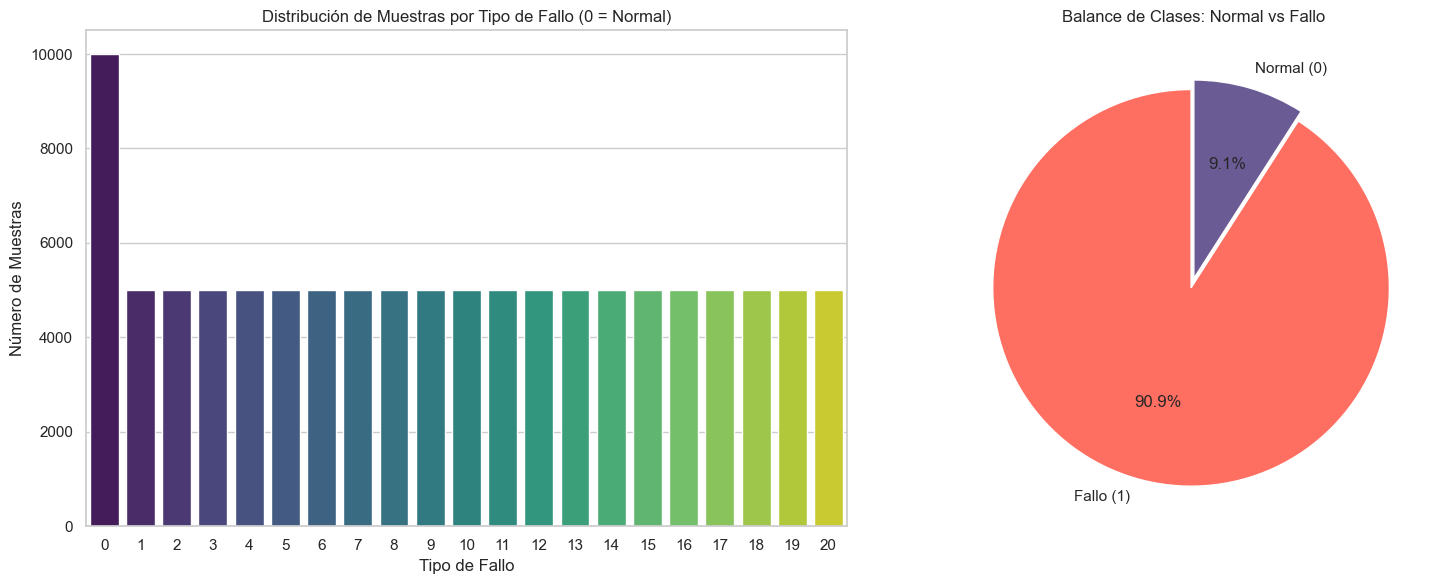

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Conteo de muestras por tipo de fallo específico
sns.countplot(data=df_eda, x='faultNumber', palette='viridis', ax=ax[0])
ax[0].set_title('Distribución de Muestras por Tipo de Fallo (0 = Normal)')
ax[0].set_ylabel('Número de Muestras')
ax[0].set_xlabel('Tipo de Fallo')

# Gráfico 2: Proporción Binaria (Normal vs Fallo)
counts = df_eda['fault_present'].value_counts()
ax[1].pie(counts, labels=['Fallo (1)', 'Normal (0)'] if counts.index[0]==1 else ['Normal (0)', 'Fallo (1)'], 
          autopct='%1.1f%%', colors=['#FF6F61', '#6B5B95'], startangle=90, explode=(0.05, 0))
ax[1].set_title('Balance de Clases: Normal vs Fallo')

plt.tight_layout()
plt.show()

Aqui podemos ver graficamente los resultados del punto anterior. Esta distribución se trata de una estructura atípica, donde la clase minoritaria es el estado sin fallo (90.9% vs 9.1%). Aunque la distribución de los distintos tipos de fallos esta equilibrada, a la hora de evaluar modelos de clasificación binaria habrá que tener en cuenta que el accuracy no es muy buena métrica.

### 3. Comportamiento de los sensores
El objetivo de este apartado es identificar visualmente si la presencia de un fallo altera la media o la varianza de la señal. Una separación clara indica un predictor fuerte, mientras que un solapamiento significativo sugiere que la variable por sí sola es insuficiente para detectar la anomalía.

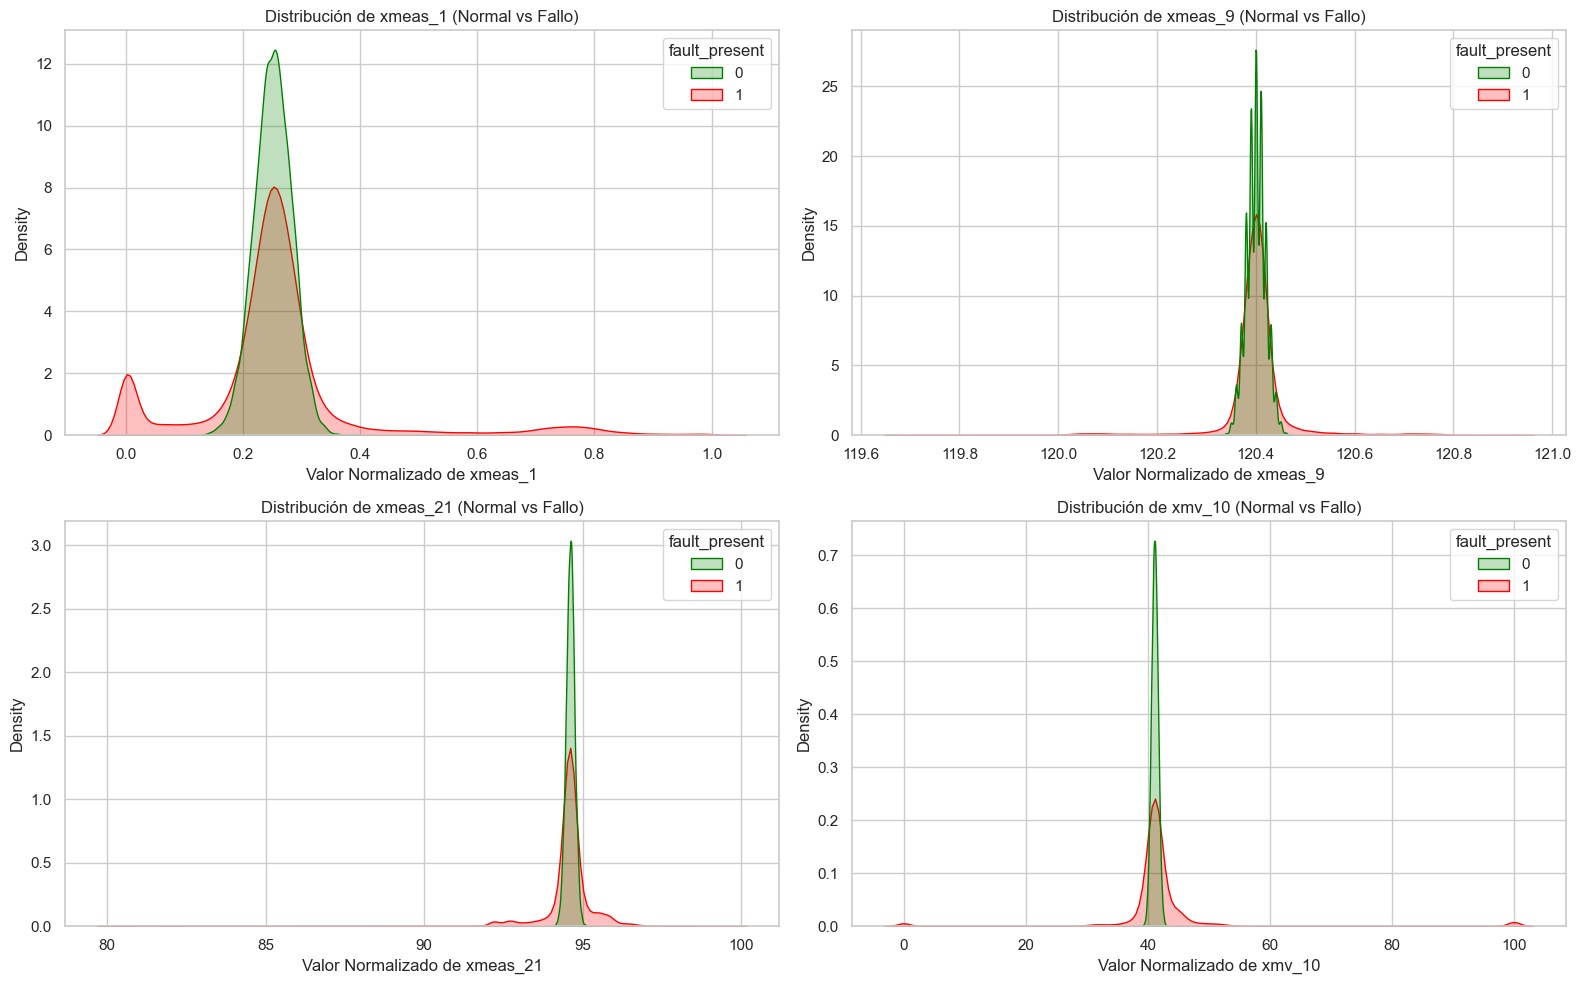

In [36]:
# Ejemplos de variables a inspeccionar
vars_to_plot = ['xmeas_1', 'xmeas_9', 'xmeas_21', 'xmv_10'] 

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(vars_to_plot):
    sns.kdeplot(data=df_eda, x=var, hue='fault_present', fill=True, 
                common_norm=False, palette={0: 'green', 1: 'red'}, ax=axes[i])
    
    axes[i].set_title(f'Distribución de {var} (Normal vs Fallo)')
    axes[i].set_xlabel(f'Valor Normalizado de {var}')

plt.tight_layout()
plt.show()

Los gráficos muestran que el estado normal (verde) es muy estable, con picos estrechos y centrados. En cambio, el estado de fallo (rojo) introduce inestabilidad, aumentando la varianza (curvas más anchas) y provocando valores extremos, como se observa claramente en xmv_10 con picos en 0 y 100 (saturación). En la aplicación de streamlit estarán los gráficos de todas las variables para poder analizarlas.

### 4. Análisis Temporal

Los fallos no son eventos estáticos, sino que evolucionan a lo largo del tiempo. Por eso vamos a visualizar como se comportan las variables a lo largo de las muestras de una simulación. 

Comparando Simulación Normal (ID: 10.0) vs. Simulación con Fallo (ID: 69.0)


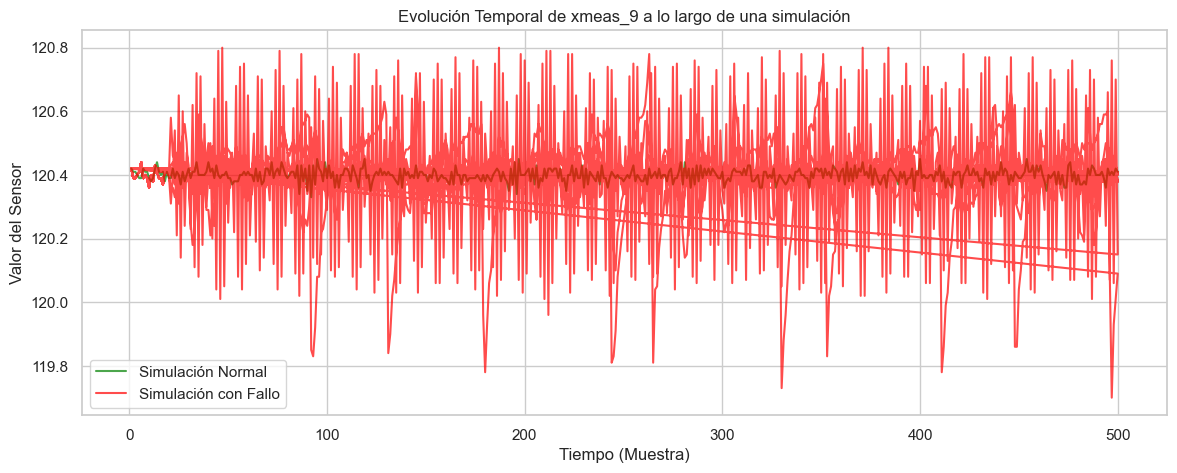

In [44]:
# Seleccionamos una simulación normal y una con fallo
run_id_normal = df_normal['simulationRun'].unique()[0]
run_id_faulty = df_faulty['simulationRun'].unique()[0]

print(f"Comparando Simulación Normal (ID: {run_id_normal}) vs. Simulación con Fallo (ID: {run_id_faulty})")

# 2. Filtramos los datos exactos usando esos IDs
sim_normal = df_normal[df_normal['simulationRun'] == run_id_normal]
sim_faulty = df_faulty[df_faulty['simulationRun'] == run_id_faulty]
variable_temporal = 'xmeas_9' 

plt.figure(figsize=(14, 5))
plt.plot(sim_normal['sample'], sim_normal[variable_temporal], label='Simulación Normal', color='green', alpha=0.7)
plt.plot(sim_faulty['sample'], sim_faulty[variable_temporal], label='Simulación con Fallo', color='red', alpha=0.7)

plt.title(f'Evolución Temporal de {variable_temporal} a lo largo de una simulación')
plt.xlabel('Tiempo (Muestra)')
plt.ylabel('Valor del Sensor')
plt.legend()
plt.show()

Mientras que en el estado normal la variable xmeas_9 mantiene un comportamiento estable, en la simulación con fallo se observa una clara inestabilidad.

### 5. Matriz de Correlación

Este análisis de correlación busca identificar dependencias lineales entre los sensores, lo cual es fundamental para entender la estructura multivariable de los datos y evaluar la posibilidad de reducir la dimensionalidad sin perder capacidad predictiva.

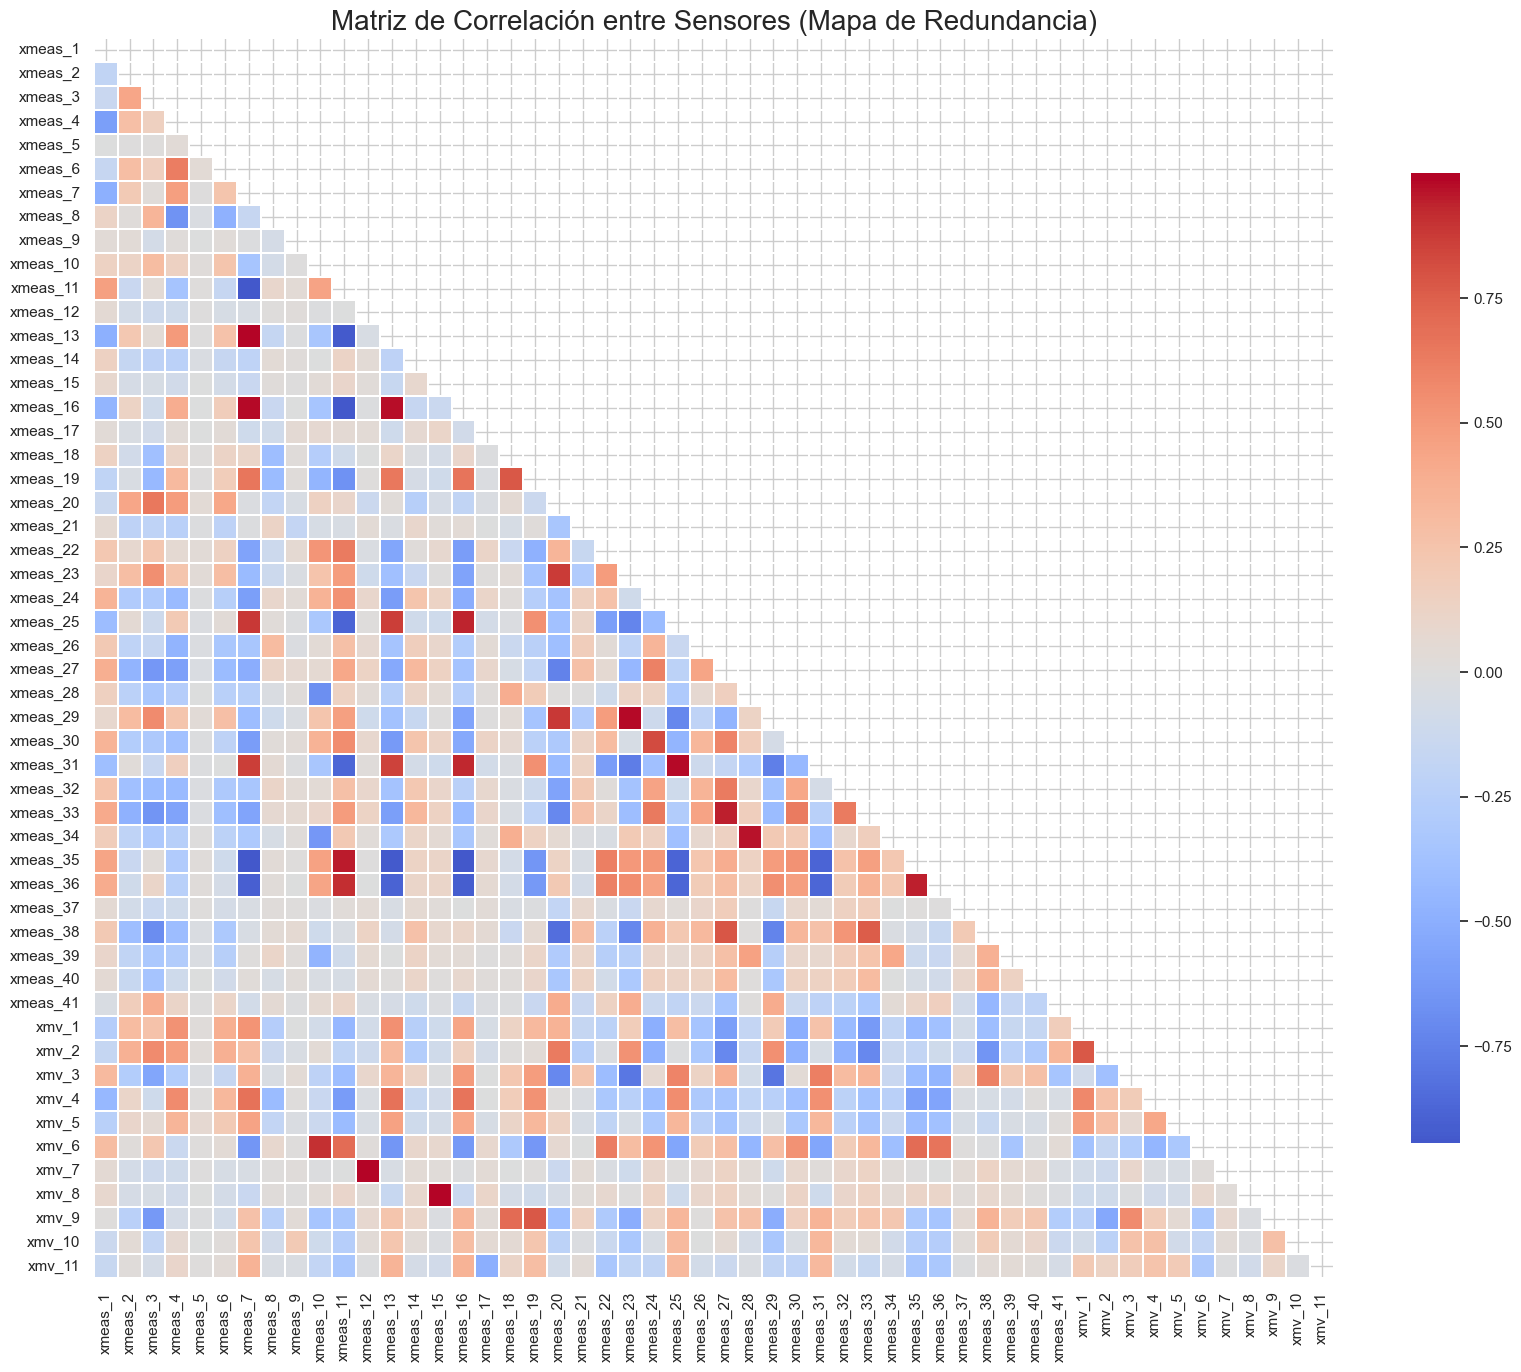

In [46]:
# Selección de columnas numéricas (Proceso + Actuadores)
cols_corr = process_vars + actuator_vars

# Cálculo de la matriz de correlación
df_corr = df_eda[cols_corr].sample(10000, random_state=42)
corr_matrix = df_corr.corr()

# Configuración del Gráfico
plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generación del Heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap='coolwarm', 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar_kws={"shrink": .7},
    xticklabels=True,
    yticklabels=True
)

plt.title('Matriz de Correlación entre Sensores (Mapa de Redundancia)', fontsize=20)
plt.show()

Podemos observar que hay fuertes relaciones entre distintas variables, indicado por la intensidad del color. Esto supone que existe una significativa redundancia de información en el dataset. Se confirma que no todas las variables aportan información única, lo cual justifica la futura aplicación de técnicas de reducción de dimensionalidad (como PCA) para simplificar el modelo.

### 6. Proyección 2D con PCA
Para entender si los fallos son separables geométricamente, utilizamos PCA (Análisis de Componentes Principales) para reducir las 52 dimensiones a 2 y visualizar clusters.


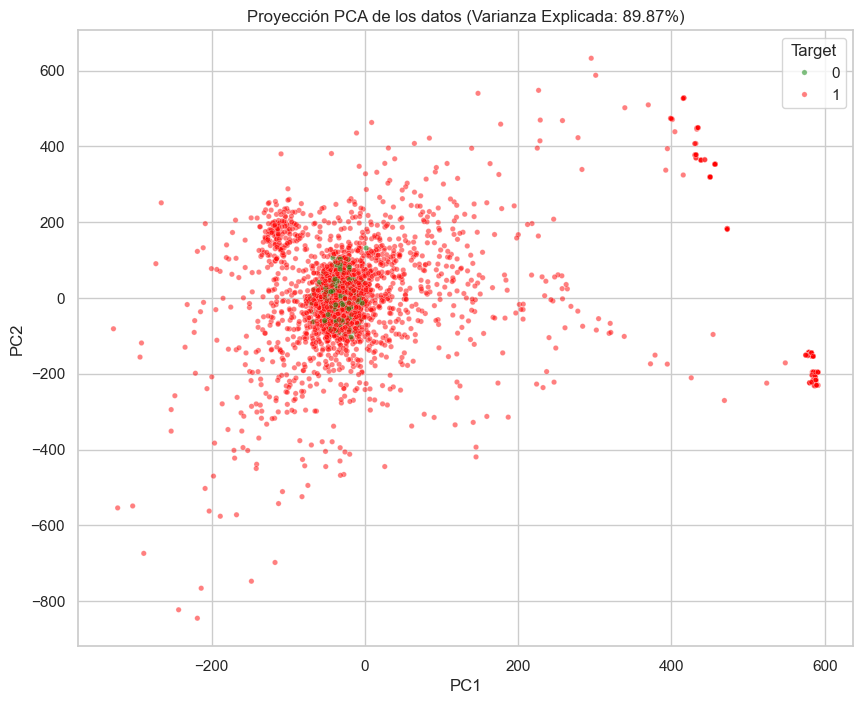

In [48]:
from sklearn.decomposition import PCA

# 1. Separamos features y target
X = df_eda[process_vars + actuator_vars]
y = df_eda['fault_present']

# 2. Aplicamos PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Creamos un dataframe temporal para graficar
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y.values

# 4. Graficamos (Usamos una muestra de 5000 puntos para no saturar el gráfico)
df_pca_sample = df_pca.sample(5000, random_state=42)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca_sample, x='PC1', y='PC2', hue='Target', 
    palette={0: 'green', 1: 'red'}, alpha=0.5, s=15
)
plt.title(f'Proyección PCA de los datos (Varianza Explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%)')
plt.show()

El gráfico muestra que el estado normal (verde) forma un grupo compacto en el centro, reflejando estabilidad. En cambio, los fallos (rojo) están muy dispersos por todo el espacio. Esta separación visual confirma que la mayoría de los fallos son distinguibles geométricamente, aunque el solapamiento en la zona central sugiere que los fallos más leves serán más difíciles de detectar.